## Correlation Analysis

In this section we calculate the mean of r-squared for each feature, in order to determine if there is a strong correlation between each feature and all of the other features. We repeat the process for all feaures to find correlations.

In [1]:
library(MASS)

In [2]:
data(Boston)

In [3]:
dim(Boston)

[1] 506  14

In [4]:
Boston$medv <- NULL

In [5]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [6]:
install.packages('rpart')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
library(caret)
library(rpart)

Loading required package: lattice
Loading required package: ggplot2


In [8]:
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

In [9]:
mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:100) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}

In [10]:
for (i in 1:length(Boston))
    print(paste(colnames(Boston[i]),':     ',mean_r2_for_feature(Boston,colnames(Boston[i]))))

[1] "crim :      0.337867640365037"
[1] "zn :      0.796693215964554"
[1] "indus :      0.86482387983744"
[1] "chas :      -0.056001870191099"
[1] "nox :      0.825573883031021"
[1] "rm :      0.378920418346966"
[1] "age :      0.684273918080701"
[1] "dis :      0.802227890552688"
[1] "rad :      0.895493127581887"
[1] "tax :      0.89965395963121"
[1] "ptratio :      0.812461970242912"
[1] "black :      0.147882584087094"
[1] "lstat :      0.569441570669039"


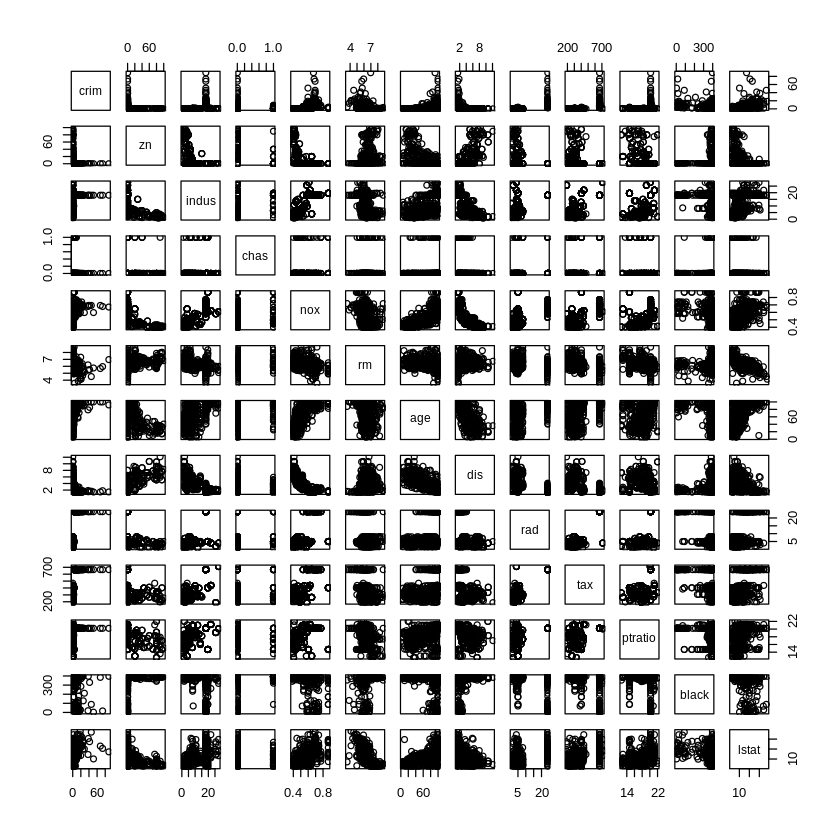

In [11]:
pairs(Boston)

In [12]:
cor(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934


In [13]:
library(reshape2)
cormat = cor(Boston)

In [14]:
cormat[lower.tri(cormat)] <- NA

In [15]:
melted_cormat <- melt(cormat, na.rm = T)

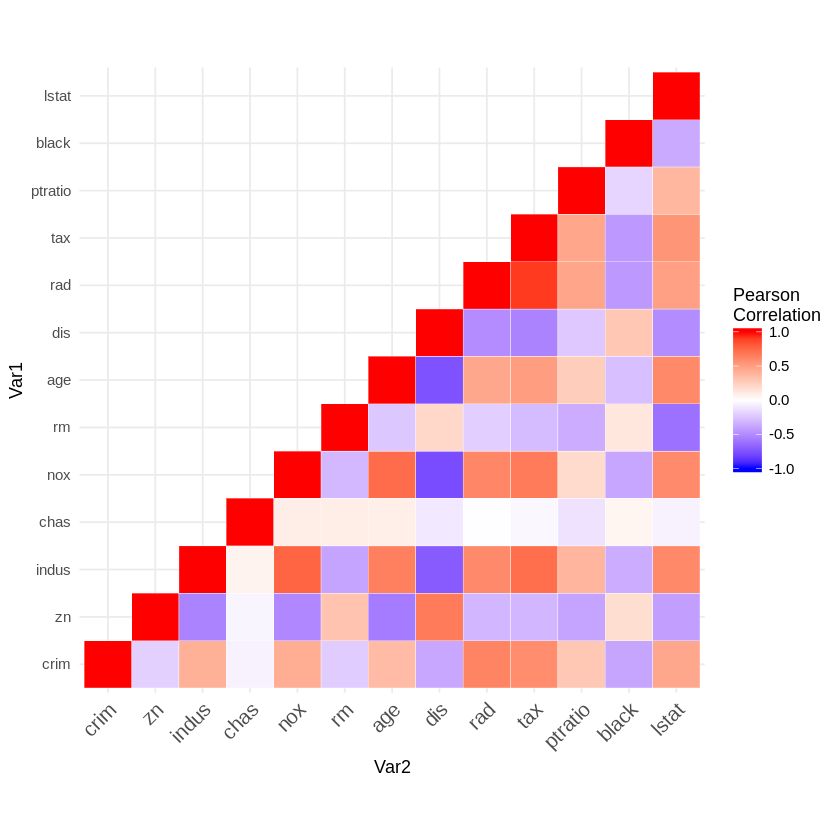

In [16]:
library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

### Correlation Across Features

The correlation between features can be inferred from the following:

    1) Pair-plot - Linear relationship between each pair of features
    2) Correlation Table - Numbers closer to 1.0
    3) Heatmap - Darker shades of red based on the color palette of the legend
    
As an example there is a strong correlation between rad and tax (0.910228189)
    
    